# ALGERIAN DATASET LINEAR REGRESSON 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_algenrian_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## sep1-> feature engineering and EDA

In [3]:
df.shape

(243, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [6]:
# day month year kaje lagbe na so drop these colm 
df_copy = df.drop( ['day','month','year'] , axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
# classes ke encoding korte hbe 
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
# unnecessary space dlt kor 
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [9]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [10]:
# not fire ke encode with 0 and fire ke 1 
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)


In [11]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [12]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [13]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<AxesSubplot: >

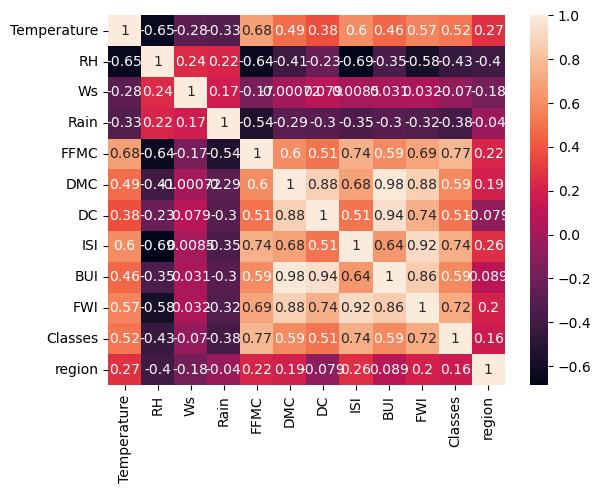

In [14]:
sns.heatmap(df_copy.corr() , annot=True)

## step2->independent and dependent feature 

In [15]:
# let FWI is the dependent featuer 
Y = df_copy['FWI'] # dependeent fetature 
X = df_copy.drop('FWI' , axis=1)  # indp feature

In [16]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
X.shape

(243, 11)

In [18]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

## stp3 --> train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25,random_state=42)

In [21]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [22]:
y_train.shape , y_test.shape

((182,), (61,))

## step4- Feature Selection 

In [23]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

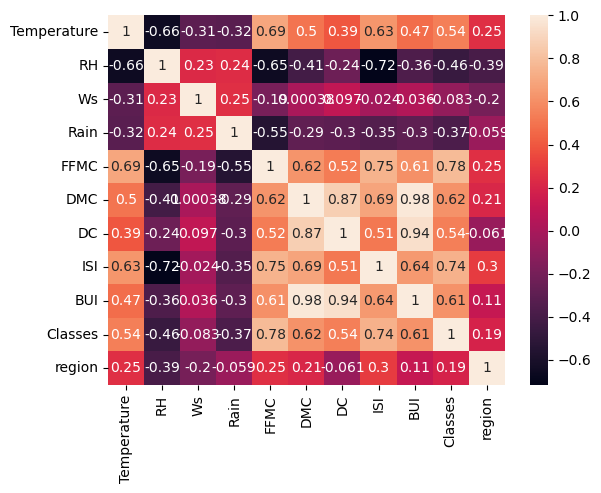

In [24]:
sns.heatmap(x_train.corr() ,annot=True)

In [25]:
x_train.head(2)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1


In [26]:
# feature selection function 
def feature_selection (dataframe , threshold):
    matrix = dataframe.corr()
    col_corr = set()  # jate duplicate colm store na hoi 
    for i in range(len(matrix.columns)):
        for j in range(i):
            #check threshold theke besi kina 
            if abs(matrix.iloc[i,j]) > threshold:
                colname = matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [27]:
# now call the function 
col_features = feature_selection(x_train,0.85)
col_features

{'BUI', 'DC'}

In [28]:
# concluion bui and  dc is highly corelated so drop these colm 
x_train.drop(col_features,axis=1,inplace=True)

In [31]:
# drop those also from test 
x_test.drop(col_features,axis=1,inplace=True)

In [32]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


## step4-> Standerd Scaling down of X

In [33]:
from sklearn.preprocessing import StandardScaler

# objet creation 
scaler = StandardScaler()

# fit and transform the x_train 
x_train_scaled = scaler.fit_transform(x_train)

# transform the x_test 
x_test_scaled = scaler.transform(x_test)


In [34]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [35]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## step6-> LINEAR REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression

# object create 
regressor = LinearRegression()

# fit -> intercept and coef berobe 
regressor.fit(x_train_scaled,y_train)

# intercept and coef 
print('intercept is -->',regressor.intercept_)
print('all coef are -->\n',regressor.coef_)   # 9 ta features so 9 ta slope / coef

# predict for test data 
y_test_pred = regressor.predict(x_test_scaled)

print('\n predicted point is\n ' ,y_test_pred)

intercept is --> 7.156043956043957
all coef are -->
 [-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298  0.40422124 -0.39259928]

 predicted point is
  [ 8.22340505e+00  7.75252922e+00 -2.54117416e-01  4.35589319e+00
  6.69135945e+00  1.36202538e+00  2.03864111e+00  7.79328670e+00
  1.72547890e+00  3.33158516e+00  4.13723043e-01  9.75001593e+00
  9.33180880e+00  1.70522541e+01  1.85133518e+01  1.24250301e+00
  1.85818589e+00 -2.19341618e-02  7.18794479e+00  3.06137615e+00
  1.43702876e+00  2.31135272e-01  6.57677437e+00  3.31761969e-01
  2.10846121e+01  5.11915298e+00  5.93220317e+00  9.80969813e+00
 -6.46764212e-02  9.81330986e+00  6.64475980e+00 -4.53909646e-01
  1.04015941e+01  1.45820244e+01  1.47807316e+00  4.33773546e-01
  2.04109845e+00  6.08454570e+00 -4.65467631e-01 -3.05185642e-01
  6.68439528e+00  1.79727675e+00  8.59237254e+00 -2.66715046e-01
  1.54439592e+01  8.32647113e+00  8.25849719e+00  1.42038134e+00
  1.29740729e+01  1.21912915e+00  

In [41]:
# now calculate mae 
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_test_pred)
print('mean absolute error is ',MAE)

# accuracy r2 value 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_test_pred)
print('accuracy is ' , score*100)

mean absolute error is  0.5468236465249985
accuracy is  98.47657384266951


## LASSO REGRESSION 

In [62]:
from sklearn.linear_model import Lasso

# object create 
lasso = Lasso()

# fit 
lasso.fit(x_train_scaled,y_train)

# predict 
y_test_pred = lasso.predict(x_test_scaled)

print('predicted data is ->\n' , y_test_pred)

predicted data is ->
 [ 7.84570511  7.4760351   1.06280248  5.57182566  7.15885302  2.98472993
  3.29585571  7.88757659  2.64885633  3.93029159  1.49954269  9.90939713
  9.38584995 15.7567602  16.31754696  2.94285845  2.56817739 -0.40623463
  7.0973165   4.05837568  2.78651163  0.83183302  6.46086185  0.80409291
 19.21068568  5.76645732  5.86530516  9.16901185 -0.64326039  9.83769504
  6.56628861  1.06684001  9.62691324 13.06176805  2.57722597  2.28322385
  2.59487225  6.44426082  0.37191286  0.3915779   6.32171041  2.93276462
  8.11248975 -0.54845009 14.49798226  7.96825553  8.55326749  2.03662688
 12.4409409   1.88633635 25.87619242  6.07660958 15.93875663 17.14160346
 12.52311598 14.3603987   2.35836911  9.12915914  4.68421388 13.65732474
  5.85117379]


In [63]:
# check mae and accuracy 
# now calculate mae 
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_test_pred)
print('mean absolute error is ',MAE)

# accuracy r2 value 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_test_pred)
print('accuracy of lasso is ' , score*100)

mean absolute error is  1.133175994914409
accuracy of lasso is  94.92020263112389


## RIDGE REGRESSION

In [59]:
from sklearn.linear_model import Ridge

# object 
ridge = Ridge()

# fit -> training data r respect 
ridge.fit(x_train_scaled,y_train)

# predict 
y_test_pred = ridge.predict(x_test_scaled)

print('predicted data is ->\n' , y_test_pred)

predicted data is ->
 [ 8.23695957  7.77133489 -0.20576373  4.38641746  6.73014882  1.38083778
  2.09821574  7.89573609  1.68710448  3.39608166  0.45955107  9.77115691
  9.35289622 17.03184252 18.46891974  1.31920963  1.83197436 -0.12967473
  7.18616187  3.15029834  1.4415705   0.20532056  6.60901914  0.34619299
 20.97777968  5.22692975  5.97066219  9.82599838 -0.18171193  9.83698303
  6.65050786 -0.43256887 10.40995342 14.57517502  1.52182034  0.47799404
  2.09598786  6.18530003 -0.51720703 -0.27108924  6.74656177  1.8115675
  8.60302337 -0.34697492 15.41467762  8.34164636  8.27783782  1.41852757
 12.97837116  1.24905696 29.40913561  5.66093325 17.23898525 19.38721803
 13.82278407 16.19164908  0.70419803  9.05107798  3.6760472  14.63186999
  5.27050843]


In [61]:

# now calculate mae 
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_test_pred)
print('mean absolute error is ',MAE)

# accuracy r2 value 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_test_pred)
print('accuracy of ridge  is ' , score*100)

mean absolute error is  0.5642305340105692
accuracy of ridge  is  98.42993364555514


## ELASTIC NET REGRESSION

In [64]:
from sklearn.linear_model import ElasticNet

# object 
elastic = ElasticNet()

# fit 
elastic.fit(x_train_scaled,y_train)

# predict
y_test_pred = elastic.predict(x_test_scaled)

print('predicted data is ->\n' , y_test_pred)

predicted data is ->
 [ 8.440192    8.48416748  1.58398174  5.74704744  7.99925012  3.84543773
  4.65423145  9.85746701  2.41164568  4.42033198  1.69311557  9.29479476
  9.94989153 14.80040551 14.99184886  3.85114187  2.99061658 -0.97985369
  7.64927581  6.40186267  2.76037744  0.786395    7.65023687  1.04550366
 17.05166573  8.10156058  7.10480686  9.72405017 -1.63030854  9.98040215
  6.77739365  1.80475174  9.66423333 12.61018368  3.22848878  2.95760651
  4.2159643   8.47055095 -0.0452998  -0.22390909  8.07425176  3.59582409
  9.01788865 -1.00255442 13.98138726  8.47227471  8.66221408  2.37166362
 12.20709739  2.13892487 22.42259827  8.36459938 14.18257366 15.41045041
 12.03375106 13.32632753  3.23749418  9.62446446  5.98090909 13.781952
  7.4239577 ]


In [65]:

# now calculate mae 
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_test_pred)
print('mean absolute error is ',MAE)

# accuracy r2 value 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_test_pred)
print('accuracy 0f elastic net  is ' , score*100)

mean absolute error is  1.8822353634896005
accuracy 0f elastic net  is  87.53460589519703


# COCCLUSION -
 - linear reg acc = 98.47%
 - ridge reg acc = 98.42%
 - lasso reg acc = 94.92%
 - elastic reg acc= 87.53%
 
 - but we choose ridge reg cause it reduce overfiting 

## pickling

In [66]:
import pickle

# dump two model -> scaler and ridge 

pickle.dump(scaler, open('scaler_final.pkl' , 'wb'))

pickle.dump(ridge , open('ridge_final.pkl' , 'wb'))

## why we scale down the data 

<AxesSubplot: >

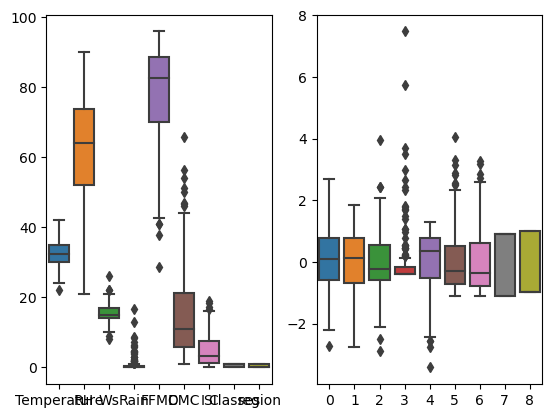

In [70]:
plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(x_train)

plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)

In [ ]:
# scale down korey dile ou;tliers handeled kora jai 